In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.	Download the Gross Domestic Product (GDP) per capita dataset from [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD). Rename it to gdp_per_capita.csv and place it in the `data` folder of your project repository.

2. Create a Jupyter Notebook in the `notebooks` folder and name it `UN_Data_Exploration`.
    *  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
    * Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. [Here](https://www.markdownguide.org/cheat-sheet/) is a link to a cheat sheet showing the basics of styling text using Markdown.

3.	In the first cell of your notebook, import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`
    
    Keep all imports in this cell at the top of your notebook.
    
4.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. 
    * Take a look at the first 10 rows. 
    * Look at the last 5 rows. Do you see a problem?
    * Redo the read_csv() call to correct this issue - **do not** modify the original csv file.
    

In [222]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv',
                    skipfooter = 2,
                    engine='python')

In [223]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv',
                    nrows = 6868)

In [224]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6868 non-null   object 
 1   Year             6868 non-null   int64  
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 214.8+ KB


In [225]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [226]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

nrows = gdp_df.loc[~gdp_df['Value'].isna()].shape[0]

gdp_df = pd.read_csv('../data/gdp_per_capita.csv',
            nrows = nrows)

5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [227]:
gdp_df = (
    pd.read_csv('../data/gdp_per_capita.csv')
    .drop([6868, 6869])
    .drop(columns = ['Value Footnotes'])
    .rename(columns = {
        'Country or Area': 'Country',
        'Value': 'GDP_Per_Capita'
    })
)

In [228]:
gdp_df

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [229]:
gdp_df.shape

(6868, 3)

In [230]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   object 
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), object(2)
memory usage: 161.1+ KB


In [231]:
gdp_df['Year'] = gdp_df['Year'].astype(int)

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [232]:
sorted(gdp_df['Year'].unique())

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019]

In [233]:
gdp_df['Year'].value_counts().sort_index()

1990    207
1991    208
1992    209
1993    212
1994    214
1995    221
1996    221
1997    223
1998    223
1999    224
2000    231
2001    232
2002    233
2003    233
2004    234
2005    234
2006    235
2007    235
2008    235
2009    236
2010    236
2011    237
2012    237
2013    238
2014    238
2015    238
2016    238
2017    238
2018    237
2019    231
Name: Year, dtype: int64

In [234]:
gdp_df.groupby(['Year'])['Year'].count()

Year
1990    207
1991    208
1992    209
1993    212
1994    214
1995    221
1996    221
1997    223
1998    223
1999    224
2000    231
2001    232
2002    233
2003    233
2004    234
2005    234
2006    235
2007    235
2008    235
2009    236
2010    236
2011    237
2012    237
2013    238
2014    238
2015    238
2016    238
2017    238
2018    237
2019    231
Name: Year, dtype: int64

8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [235]:
gdp_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', "CÃ´te d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'CuraÃ§ao', 'Cyprus', 'Czech Republic',
       'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD)', 'Ecuador', 'Egypt',

In [236]:
gdp_df['Country'].nunique()

238

In [237]:
gdp_df['Country'].value_counts().tail(10)

CuraÃ§ao                     20
Qatar                        20
Palau                        20
SÃ£o TomÃ© and Principe      19
Afghanistan                  18
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, dtype: int64

In [238]:
gdp_df['Country'].value_counts().loc[lambda x : x < 20] 

SÃ£o TomÃ© and Principe      19
Afghanistan                  18
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, dtype: int64

In [239]:
gdp_df['Country'].value_counts().head(10)

Lebanon          30
Middle income    30
Morocco          30
Mozambique       30
Myanmar          30
Namibia          30
Nepal            30
Netherlands      30
New Zealand      30
Nicaragua        30
Name: Country, dtype: int64

9. Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [240]:
gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]

10. Use `.describe()` to find the summary statistics for GDP per capita in 2014. 

In [241]:
gdp_2014['GDP_Per_Capita'].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

**Observations:**
* Mean is higher than median. Maybe there are more high values or the distribution might be skewed. Possibly outliers. Possibly skewed to the right.
* Mean is smaller than standard deviation -> Maybe skewed.
* Max value is 6 or 7 standard deviations above average, so likely an outlier.

11. Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

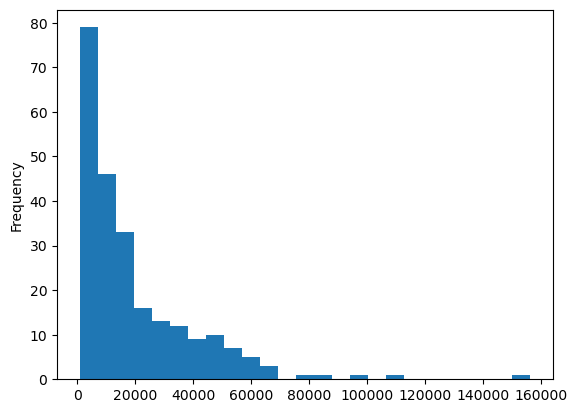

In [242]:
gdp_2014['GDP_Per_Capita'].plot(kind = 'hist', bins = 25);

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [243]:
gdp_2014.sort_values('GDP_Per_Capita').head(5)

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541


In [244]:
gdp_2014.sort_values('GDP_Per_Capita', ascending = False).head(5)

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881


In [245]:
gdp_2014.nlargest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881


In [246]:
gdp_2014.nsmallest(5, 'GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541


In [247]:
gdp_2014.sort_values('GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
3721,"Macao SAR, China",2014,156514.133850
3691,Luxembourg,2014,108760.916030
5138,Qatar,2014,95578.416973
5464,Singapore,2014,87808.663157
561,Bermuda,2014,77361.104881
...,...,...,...
4528,Niger,2014,1127.615541
1422,Dem. Rep. Congo,2014,1029.790785
3781,Malawi,2014,1027.208496
827,Burundi,2014,886.235777


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2017 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named `gdp_pivoted`.

In [248]:
gdp_df.head(2)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002


In [249]:
gdp_pivoted = (
    gdp_df
    .loc[gdp_df['Year'].isin([1990, 2017])]
    .pivot_table(values = 'GDP_Per_Capita',
                  index = 'Country',
                  columns = 'Year')
    .dropna()
)

14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [250]:
gdp_pivoted.columns

Int64Index([1990, 2017], dtype='int64', name='Year')

In [251]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

In [252]:
gdp_pivoted

Year,1990,2017,Percent_Change
Country,,,
Albania,4842.734635,12811.759436,164.556297
Algeria,8746.352901,11737.409353,34.197756
Angola,5783.429064,7310.901738,26.411194
Antigua and Barbuda,15459.551675,19840.076123,28.335391
Arab World,9694.667544,14555.474921,50.138980
...,...,...,...
Vanuatu,2888.309393,3116.645194,7.905517
Vietnam,1673.249634,7155.745829,327.655604
World,9680.269697,16253.385518,67.902197


15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [253]:
gdp_pivoted[gdp_pivoted['Percent_Change'] < 0].shape[0]

17

In [254]:
(gdp_pivoted['Percent_Change'] < 0).sum()

17

In [255]:
len(gdp_pivoted[gdp_pivoted['Percent_Change'] < 0])

17

In [256]:
(gdp_pivoted['Percent_Change'] < 0).mean()

0.0821256038647343

In [257]:
sum(n < 0 for n in gdp_pivoted['Percent_Change'].values.flatten()) 

17

16. Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?  **Bonus:** Put both line charts on the same plot.

In [258]:
top_pc = gdp_pivoted.nlargest(2, 'Percent_Change').index[0]
second_pc = gdp_pivoted.nlargest(2, 'Percent_Change').index[1]

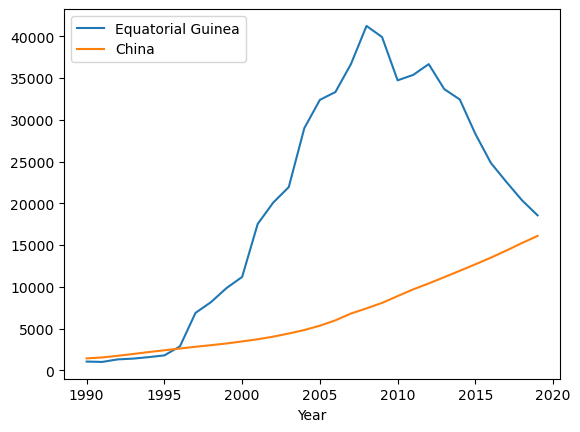

In [259]:
ax = gdp_df[gdp_df['Country'] == top_pc].plot(x = 'Year', y = 'GDP_Per_Capita', label = top_pc)
gdp_df[gdp_df['Country'] == second_pc].plot(x = 'Year',
                                            y = 'GDP_Per_Capita',
                                            label = second_pc,
                                           ax = ax);

17. Read in continents.csv contained in the `data` folder into a new dataframe called `continents`. We will be using this dataframe to add a new column to our dataset.

In [260]:
continents = pd.read_csv('../data/continents.csv')
continents.head(2)

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania


In [261]:
gdp_df.shape

(6868, 3)

In [262]:
continents.shape

(216, 2)

18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [263]:
gdp_df = pd.merge(
    left = gdp_df,
    right = continents,
    how='inner', 
    on='Country'
)

In [264]:
gdp_df.shape

(5443, 4)

19. Determine the number of countries per continent. Create a bar chart showing this.

In [265]:
gdp_df

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia
...,...,...,...,...
5438,Zimbabwe,1994,3263.934978,Africa
5439,Zimbabwe,1993,3033.504852,Africa
5440,Zimbabwe,1992,3054.889178,Africa
5441,Zimbabwe,1991,3426.598094,Africa


In [266]:
gdp_df.drop_duplicates(subset='Country').groupby('Continent')['Country'].count()

Continent
Africa           49
Asia             43
Europe           45
North America    26
Oceania          14
South America    11
Name: Country, dtype: int64

<AxesSubplot:>

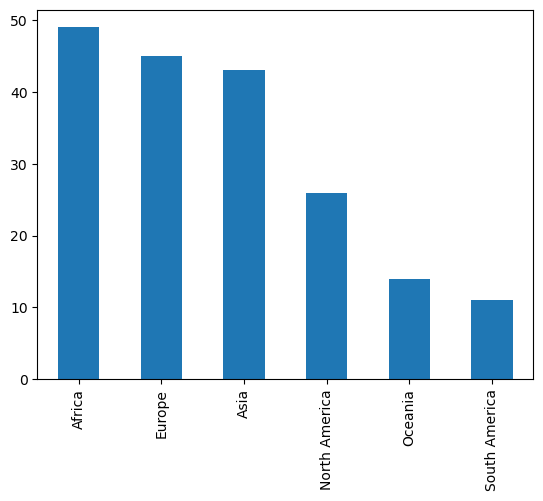

In [267]:
gdp_df.drop_duplicates(subset='Country')["Continent"].value_counts().plot(kind = "bar")

In [268]:
gdp_df.groupby('Continent')['Country'].nunique()

Continent
Africa           49
Asia             43
Europe           45
North America    26
Oceania          14
South America    11
Name: Country, dtype: int64

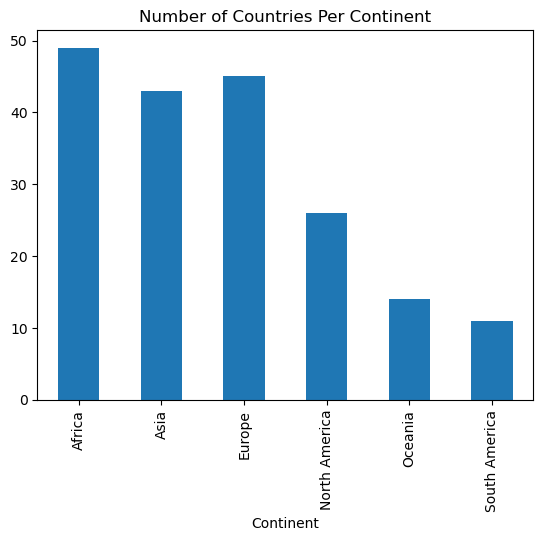

In [269]:
(
    gdp_df
    .groupby('Continent')['Country']
    .nunique()
    .plot(kind = 'bar',
          title = 'Number of Countries Per Continent')
);   

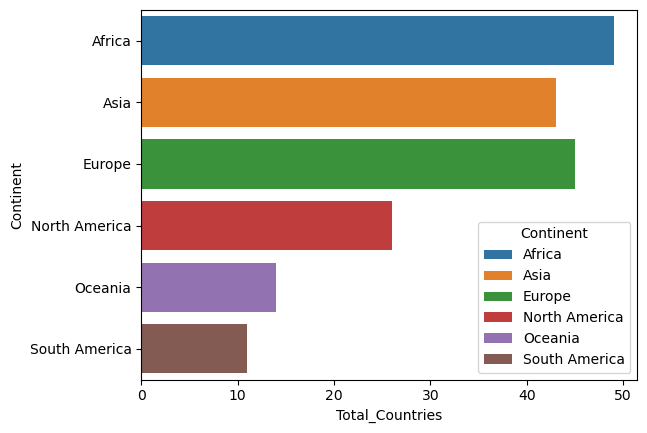

In [270]:
sns.barplot(data=gdp_df.groupby(['Continent'])['Country'].nunique().to_frame().reset_index().rename(columns = {'Country' : 'Total_Countries'}), y='Continent', x='Total_Countries', hue='Continent', dodge=False); 


20. Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

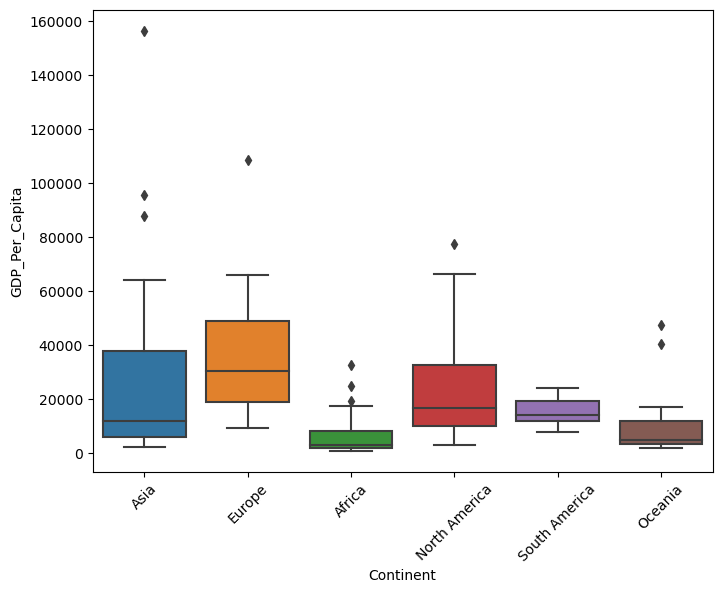

In [271]:
fig, ax = plt.subplots(figsize = (8,6))

sns.boxplot(
    data = gdp_df[gdp_df['Year'] == 2014],
    x = 'Continent',
    y = 'GDP_Per_Capita',
    ax = ax
)
plt.xticks(rotation = 45);

21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`.

In [272]:
life_expectancy = pd.read_csv('../data/API_SP.DYN.LE00.IN_DS2_en_csv_v2_4473398/API_SP.DYN.LE00.IN_DS2_en_csv_v2_4473398.csv',
                             header = 2)

In [273]:
life_expectancy

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,...,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,AFE,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,...,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN
2,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,...,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN,NaN
3,Africa Western and Central,AFW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,...,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN,NaN
4,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,...,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.797561,71.097561,71.346341,71.846341,72.295122,72.695122,73.092683,71.087805,NaN,NaN
262,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,29.919000,30.163000,30.500000,30.943000,31.501000,32.175000,...,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,66.125000,66.181000,NaN,NaN
263,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,48.406000,48.777000,49.142000,49.509000,49.888000,50.284000,...,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,64.131000,64.379000,NaN,NaN
264,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,46.687000,47.084000,47.446000,47.772000,48.068000,48.351000,...,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,63.886000,64.194000,NaN,NaN


22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use `.melt()` to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [274]:
life_expectancy = life_expectancy.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 66'])

In [275]:
life_expectancy = life_expectancy.melt(id_vars = 'Country Name',
                    var_name = 'Year',
                    value_name = 'Life_Expectancy')

In [276]:
life_expectancy = life_expectancy.rename(columns = {'Country Name': 'Country'})

23. What was the first country with a life expectancy to exceed 80?

In [277]:
life_expectancy[life_expectancy['Life_Expectancy'] > 80].sort_values('Year').head(1)

,Country,Year,Life_Expectancy
9695,Japan,1996,80.200244


In [278]:
life_expectancy[life_expectancy.Life_Expectancy > 80].iloc[0] 

Country                Japan
Year                    1996
Life_Expectancy    80.200244
Name: 9695, dtype: object

In [279]:
life_expectancy[life_expectancy["Life_Expectancy"] > 80].sort_values(by=["Life_Expectancy"], ascending=True) 

,Country,Year,Life_Expectancy
15343,OECD members,2017,80.005170
13051,Belgium,2009,80.034146
12147,Norway,2005,80.041463
15467,Chile,2018,80.042000
11742,Channel Islands,2004,80.045000
...,...,...,...
16079,Japan,2020,84.615610
15258,"Hong Kong SAR, China",2017,84.680488
15524,"Hong Kong SAR, China",2018,84.934146
15790,"Hong Kong SAR, China",2019,85.078049


In [280]:
life_expectancy[life_expectancy['Life_Expectancy']>80].iloc[0]['Country'] 

'Japan'

24. Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [281]:
gdp_df.head(2)

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia


In [282]:
life_expectancy.head(2)

,Country,Year,Life_Expectancy
0,Aruba,1960,65.662000
1,Africa Eastern and Southern,1960,42.716053


In [283]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5443 entries, 0 to 5442
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         5443 non-null   object 
 1   Year            5443 non-null   int64  
 2   GDP_Per_Capita  5443 non-null   float64
 3   Continent       5443 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 212.6+ KB


In [285]:
life_expectancy['Year'] = life_expectancy['Year'].astype(int)

In [286]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16492 entries, 0 to 16491
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          16492 non-null  object 
 1   Year             16492 non-null  int64  
 2   Life_Expectancy  14858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 386.7+ KB


In [290]:
gdp_le = pd.merge(
    left = gdp_df,
    right = life_expectancy,
)

25. Create a new DataFrame, named `gdp_le_2019` by extracting data for the year 2019 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2019?

In [291]:
gdp_le_2019 = gdp_le[gdp_le['Year'] == 2019]
gdp_le_2019

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
18,Albania,2019,13724.058790,Europe,78.573
48,Algeria,2019,11510.557088,Africa,76.880
78,Angola,2019,6670.332297,Africa,61.147
108,Antigua and Barbuda,2019,21910.184985,North America,77.016
...,...,...,...,...,...
4968,Vanuatu,2019,3153.015168,Oceania,70.474
4998,Vietnam,2019,8041.178551,Asia,75.400
5028,West Bank and Gaza,2019,6219.960291,Asia,74.053
5054,Zambia,2019,3470.448801,Africa,63.886


In [293]:
(gdp_le_2019['Life_Expectancy'] >= 80).sum()

33

26. Find the countries that had the top 3 largest GDP per capita figures for 2019. Create a seaborn FacetGrid showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [298]:
top_3_gdp = gdp_le_2019.nlargest(3, 'GDP_Per_Capita')['Country'].to_list()
top_3_gdp

['Macao SAR, China', 'Luxembourg', 'Singapore']

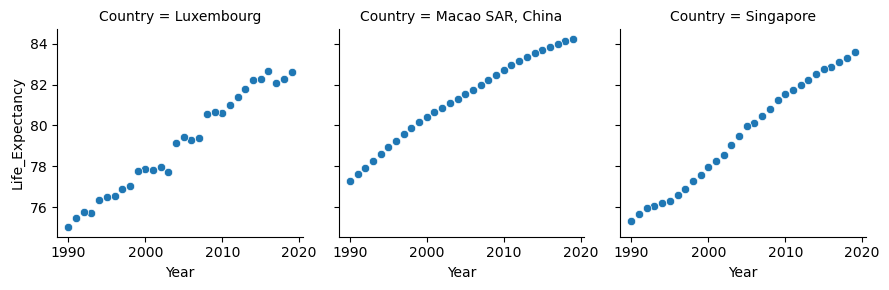

In [304]:
g = sns.FacetGrid(data = gdp_le[gdp_le['Country'].isin(top_3_gdp)],
             col = 'Country')
g.map(sns.scatterplot, 'Year', 'Life_Expectancy');

27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2019. What do you notice?

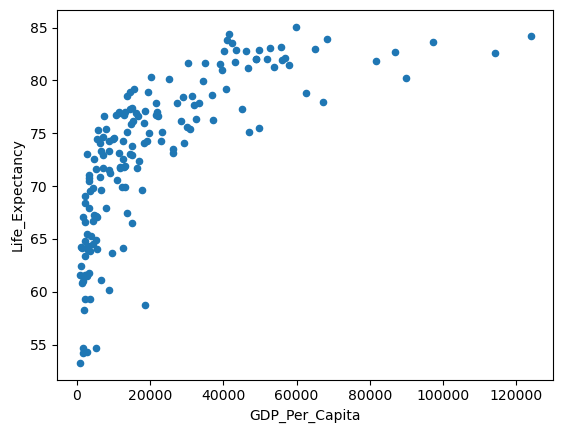

In [312]:
gdp_le_2019.plot(kind = 'scatter', x = 'GDP_Per_Capita', y = 'Life_Expectancy');

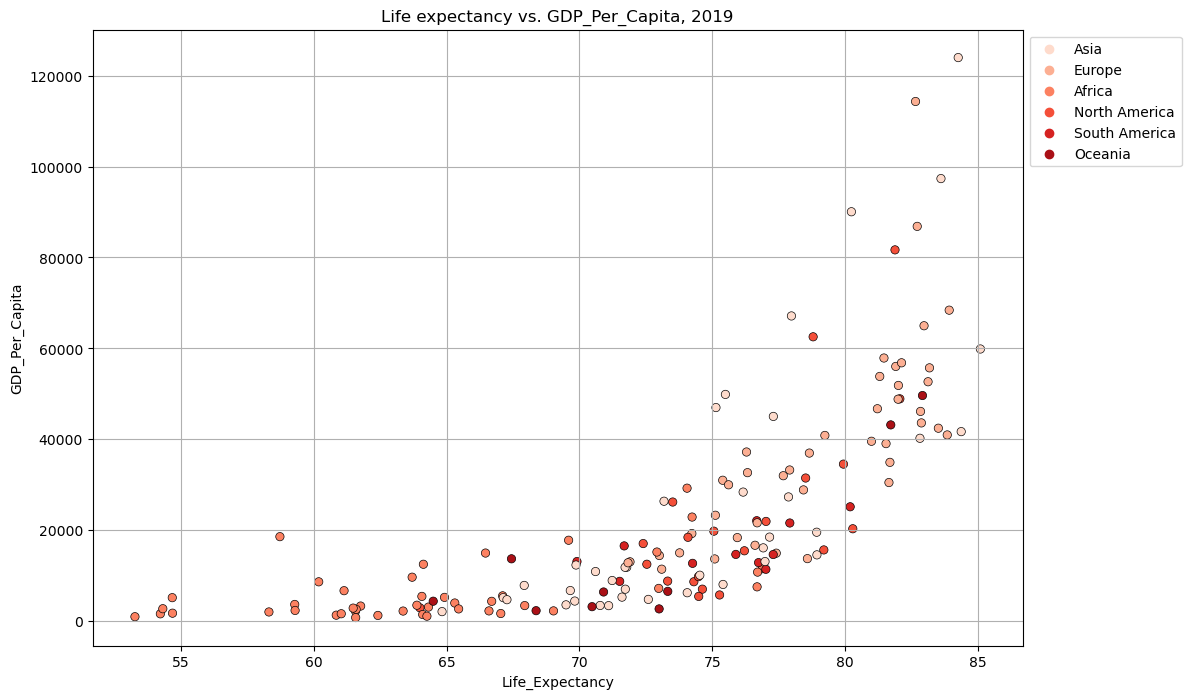

In [307]:
plt.figure(figsize = (12,8))
sns.scatterplot(data = gdp_le_2019, x = 'Life_Expectancy', y = 'GDP_Per_Capita',
hue = 'Continent', palette = 'Reds', edgecolor = 'black')
plt.title('Life expectancy vs. GDP_Per_Capita, 2019')
plt.grid(True)
plt.legend(bbox_to_anchor =(1.0, 1.0)); 

28. Find the correlation between Life Expectancy and GDP per Capita for the year 2019. What is the meaning of this number?

In [311]:
gdp_le_2019[['GDP_Per_Capita', 'Life_Expectancy']].corr()

,GDP_Per_Capita,Life_Expectancy
GDP_Per_Capita,1.000000,0.709018
Life_Expectancy,0.709018,1.000000


29. Add a column to `gdp_le_2019` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.

In [322]:
gdp_le_2019['log_gdp'] = np.log(gdp_le_2019['GDP_Per_Capita'])

/tmp/ipykernel_63345/2740929984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_le_2019['log_gdp'] = np.log(gdp_le_2019['GDP_Per_Capita'])


In [319]:
gdp_le_2019

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy,log_gdp
0,Afghanistan,2019,2065.036398,Asia,64.833,3.314928
18,Albania,2019,13724.058790,Europe,78.573,4.137483
48,Algeria,2019,11510.557088,Africa,76.880,4.061096
78,Angola,2019,6670.332297,Africa,61.147,3.824147
108,Antigua and Barbuda,2019,21910.184985,North America,77.016,4.340646
...,...,...,...,...,...,...
4968,Vanuatu,2019,3153.015168,Oceania,70.474,3.498726
4998,Vietnam,2019,8041.178551,Asia,75.400,3.905320
5028,West Bank and Gaza,2019,6219.960291,Asia,74.053,3.793788
5054,Zambia,2019,3470.448801,Africa,63.886,3.540386


In [320]:
gdp_le_2019.corr()

,Year,GDP_Per_Capita,Life_Expectancy,log_gdp
Year,NaN,NaN,NaN,NaN
GDP_Per_Capita,NaN,1.000000,0.709018,0.850396
Life_Expectancy,NaN,0.709018,1.000000,0.848498
log_gdp,NaN,0.850396,0.848498,1.000000


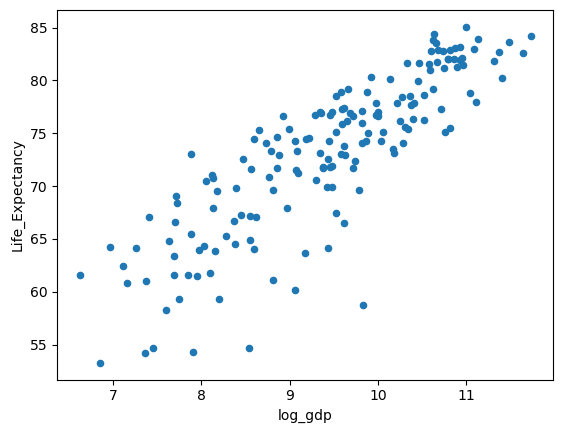

In [323]:
gdp_le_2019.plot(kind = 'scatter', x = 'log_gdp', y = 'Life_Expectancy');